
## Multivariate Adaptive Regression Splines (MARS)

#### Hao Wang
#### Hildebrand Department of Petroleum and Geosystems Engineering, Cockrell School of Engineering


### Subsurface Machine Learning Course, The University of Texas at Austin
#### Hildebrand Department of Petroleum and Geosystems Engineering, Cockrell School of Engineering
#### Department of Geological Sciences, Jackson School of Geosciences




_____________________

Workflow supervision and review by:

#### Instructor: Prof. Michael Pyrcz, Ph.D., P.Eng., Associate Professor, The Univeristy of Texas at Austin
##### [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)

#### Course TA: Misael Morales, Graduate Student, The University of Texas at Austin
##### [LinkedIn](https://www.linkedin.com/in/misaelmmorales/)


### Executive Summary
The parametric model is constrained in its flexibility, capable of providing accurate predictions only when the underlying data trend closely aligns with the predefined data form. The Multivariate Adaptive Regression Splines(MARS) is a more flexible and robust regression in its ability to capture complex and nonlinear relationship.MARS model is built by combining simple piecewise linear functions, making it interpretable.Another main advantages of MARS is the minimum feature engineering required due to its automated feature selection. Although MARS is powerful, hyperparameters must be carefully selected to prevent overfitting.

### Import Packages

* Run the following command to install Earth package for Multivariate Adaptive Regression Splines.
``` python
pip install pyearth
```
* If something goes wrong, you might try this:
``` python
git clone git://github.com/scikit-learn-contrib/py-earth.git
cd py-earth
python setup.py install --cythonize
```
* If the Earth package cannot be imported due to Numpy version. The numpy version < 1.230 might be required.
```python
pip install "numpy<1.23.0"
```

In [1]:
import numpy as np                                          #For working with data and model arrays 
import pandas as pd                                         #DataFrames 
from sklearn.linear_model import LinearRegression           # linear regression with scikit learn
import matplotlib as mpl
import matplotlib.pyplot as plt                             # for plotting
import seaborn as sns                                       # multivariate statistical displays
import warnings
warnings.filterwarnings('ignore')                           # suppress warnings
from pyearth import Earth                                   # Multivariate Adaptive Regression Splines with Earch
from sklearn.preprocessing import StandardScaler            # standardize the features
from sklearn.model_selection import train_test_split        # Training and Testing Data Split
%config InlineBackend.print_figure_kwargs = {'dpi': 100}    # For high resolution of plotting

### Functions

The following functions will be used in the workflow.

In [2]:
def plotting(metric): # to plot metrics vs max_terms in hyperparameters tuning
    plt.plot(max_terms,metric[0],'-',color = 'crimson')
    plt.scatter(max_terms,metric[0],color = 'crimson',label = 'Degree = 1',edgecolor='black')
    plt.plot(max_terms,metric[1],'-',color = 'limegreen')
    plt.scatter(max_terms, metric[1],color='limegreen', label='Degree = 2',edgecolor ='black')
    plt.plot(max_terms,metric[2],'-',color = 'orange')
    plt.scatter(max_terms,metric[2],color = 'orange',label = 'Degree = 3',edgecolor = 'black')
    plt.legend(loc='best');plt.xlabel('max_terms')

### Load Data

The following workflow applies the .csv file 'house_price.csv', a Machine Learning dataset sourced from Kaggle competition to build model to predict house price. This dataset comprehensively outlines various aspects of residential houses in Ames, Iowa, consisting of 79 explanatory features alongside the sale price of each property.The goal of this workflow is to utilize this data set to apply Multivariate Adaptive Regression Splines model for the prediction of house prices. The data set can be accessed through the following link: https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data.
The dataset is publically available [here](https://github.com/HaoWang000/Machine-Learning2023/blob/main/house_price.csv).

After feature selection,We will work with the following features:
* **MasVnrArea** - Masonry veneer area in $ft^2$
* **LotArea** - LotArea: Lot size in $ft^2$
* **OpenPorchSF** - Open porch area in $ft^2$
* **Fireplaces** - Number of fireplaces
* **TotRmsAbvGrd** - Total rooms above grade (does not include bathrooms)
* **YearRemodAdd** - Remodel date (same as construction date if no remodeling or additions) 
* **1stFlrSF** -  First Floor $ft^2$
* **GarageYrBlt** - Year garage was built
* **TotalBsmtSF** - TotalBsmtSF: Total $ft^2$ of basement area
* **FullBath** - FullBath: Full bathrooms above grade
* **GarageArea** - Size of garage in $ft^2$
* **YearBuilt** - Original construction date
* **GarageCars** - Size of garage in car capacity
* **GrLivArea** - Above grade (ground) living area $ft^2$
* **OverallQual** - Rates the overall material and finish of the house(10-1)
* **SalePrice** - The final sale price in USD

**Note**: In this dataset, there are a total of 80 features available. However, for predictive analysis, a subset of 15 predicting features has been carefully chosen based on feature engineering methodologies, which will be elaborated on in subsequent discussions.



In [3]:
df=pd.read_csv(r"https://raw.githubusercontent.com/HaoWang000/Machine-Learning2023/main/house_price.csv")

**Note**: 
* To effectively demonstrate and visualize the functionality of the Multivariate Adaptive Regression Splines (MARS) model, we'll begin by applying it to a 2D synthetic dataset. 
* This dataset comprises two variables, x and y, showing nonlinear and non-monotonic behaviors. 
* This approach will provide a clear illustration of how MARS operates in capturing and representing such complex relationships between variables. 

The following command generates synthetic data comprising five distinct segments, each depicting various relationships between the variables x and y. It introduces random noise and outliers to simulate realistic data scenarios.

In [4]:
x_1 = np.linspace(0, 2, 100)
y_1 = x_1 + 8 + np.random.uniform(-1, 1, 100)
x_2 = np.linspace(2, 3, 50)
y_2 = 10.5 + np.random.uniform(-1, 1, 50)
x_3 = np.linspace(3, 7, 200)
y_3 = 13 - x_3 + np.random.uniform(-1, 1, 200)
x_4 = np.linspace(7, 12, 150)
y_4 = 2 + 0.5 * x_4 + np.random.uniform(-1, 1, 150)
x_5 = np.linspace(12, 15, 150)
y_5 = 15 - 0.5 * x_5 + np.random.uniform(-1, 1, 150)
x = np.concatenate((x_1, x_2, x_3, x_4, x_5))
y = np.concatenate((y_1, y_2, y_3, y_4, y_5))
# Adding noise to y
y += np.random.normal(0, 0.5, len(x))
y += np.random.uniform(-1, 1, len(x))
y += np.random.normal(0, 2, len(x)) * np.sin(2 * np.pi * x / 10)
# Introduce outliers
num_outliers = 20
outlier_indices = np.random.choice(len(x), num_outliers, replace=False)
y[outlier_indices] += np.random.uniform(0, 10, num_outliers)
data_syn = {'x': x, 'y': y}

### Multivariate Adaptive Regression Splines (MARS)

The objective of this workflow is to showcase the practical implementation of the Multivariate Adaptive Regression Splines (MARS) model and emphasize its robustness. This includes highlighting MARS flexibility in capturing nonlinear patterns and its automated feature selection capabilities. The workflow comprises the following key sections:

**1.Motivation and Introduction**:Current Challenges and Understanding its Mechanism.

**2.Data Analysis**: Preparing and Analyzing the Data

**3.Building the MARS Model**: Implementing the MARS Algorithm

**4.Hyperparameters Tuning**: Optimizing Model Performance

**5.Results**: Assessing Model Performance and Insights


### Motivation and Introduction
#### Current Challenges
The prevailing approach in parametric modeling involves fitting a parametric function to training data using least-squares methods. For instance, in Linear Regression:
\begin{equation}
y = \sum_{\alpha = 1}^m b_{\alpha} x_{\alpha} + b_0
\end{equation}
This linear parametric model is constrained in its flexibility, capable of providing accurate predictions solely when the underlying data trend closely aligns with the predefined linear structure. Taking the synthetic data provided below as an example, applying linear regression fails to produce sufficiently accurate results due to the nonlinear nature of the dataset.

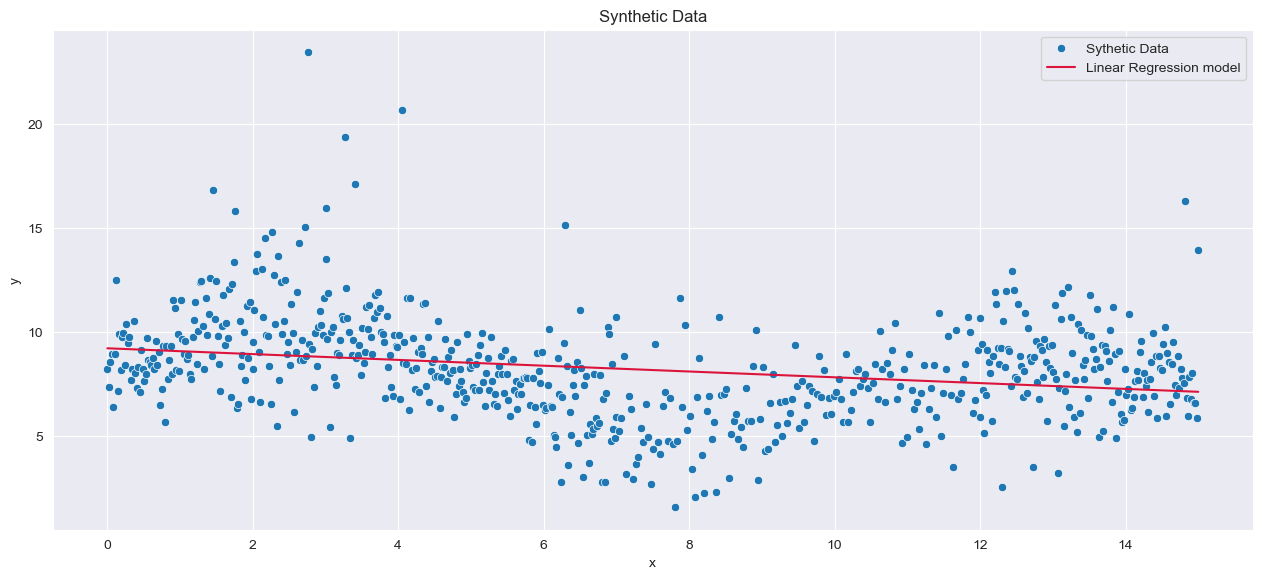

In [5]:
linear = LinearRegression()
linear.fit(x.reshape(-1, 1),y)
b1=linear.coef_[0]
b0=linear.intercept_
x_ = np.linspace(0.0,15,100)
y_fit = b0+x_*b1
plt.figure(figsize=(8,5))
sns.set_style('darkgrid')
sns.scatterplot(x='x',y='y',data=data_syn,label = "Sythetic Data")
sns.lineplot(x_,y_fit,color='crimson',label = "Linear Regression model")
plt.title("Synthetic Data")
plt.subplots_adjust(left=0.0, bottom=0.0, right=1.5, top=1, wspace=0.2, hspace=0.3);

#### MARS
Multivariate Adaptive Regression Splines is a flexible nonparametric regression modeling to capture intricate interactions and nonlinear relationships in the data. The main concepts of MARS include:

**1. Piecewise functions**: MARS divides the dataset into number of subregions(knots) and fits functions within each subregions. These piecewise functions are interconnected to construct a globally continuous model, effectively adapting to the nonlinear patterns present in the data.

**2. Basis Function** : such as Hinge Functions: Represented as h(x−t), these functions employ 't' as breakpoints to determine where each piecewise function connects. The basis function is structured in the form of:
$$ h(x-t)=  \left\{
\begin{array}{ll}
      (x-t) & x > t \\
      0 & x  \\
\end{array} 
\right. $$ 
   The final model of the MARS is constructed by assigning weight to each basis functions in the form of:
$$ y=  \left\{
\begin{array}{ll}
      a_0+a_1(t_1-x) & x < t_1 \\
      a_0+a_2(x-t_1) & x > t_1 \text{ and } x < t_2  \\
      a_0+a_3(t_2-x) & x > t_2 \\
\end{array} 
\right. $$  $a_1,a_2  \text{ and }  a_3$ are coefficients of each basis function,representing contribution of each basis function to the final model prediction.

**3. Adaptive Recursive Partitioning Regression**: to use data to simutaneously derive  a good set of basis functions(subregions) and adjust coefficients to best fit the data.

**4. Two stages Algorithm**:
* Forward Pass: determining basis functions and their associated coefficients that  minimize squared error loss within local subregions of the training set.
* Backward Pass (Pruning): preventing overfitting by eliminating redundant or less impactful basis functions. The objective is to achieve a locally minimal generalized cross-validation (GCV) score. The GCV score is a metric that aids in determining the optimal complexity by penalizing complexity while assessing the model's predictive performance without explicit performing cross validation.

#### Implementing a MARS Model 
The MARS model can be assessed from the Earth Package.
```python
from pyearth import Earth
```
To train the model, the primary code is :
```python
model = Earth()
model.fit(X, y)
yhat = model.predict(X)
```
The three key hyperparameters in MARS model are 
* **max_term** - int, optional (default=min(2 * m + n // 10, 400)),where m is the number of features and n is the number of data).It represents the maximum number of basis functions generated.
* **max_degree** - int, optional (default=1).It signifies the maximum degree of terms generated by the forward pass.
* **penalty** : float, optional (default=3.0).This hyperparameter determines the complexity penalty to prevent overfitting. It helps decide whether to add a basis function during the backward (pruning) pass.

Let's apply the MARS model to synthetic data to observe its functionality:
* Four distinct MARS models will be constructed, each varying in complexity as determined by different settings for max_terms and max_degree parameters.
* Visualization of each MARS model will include scatterplots depicting the data and the corresponding fitting line.

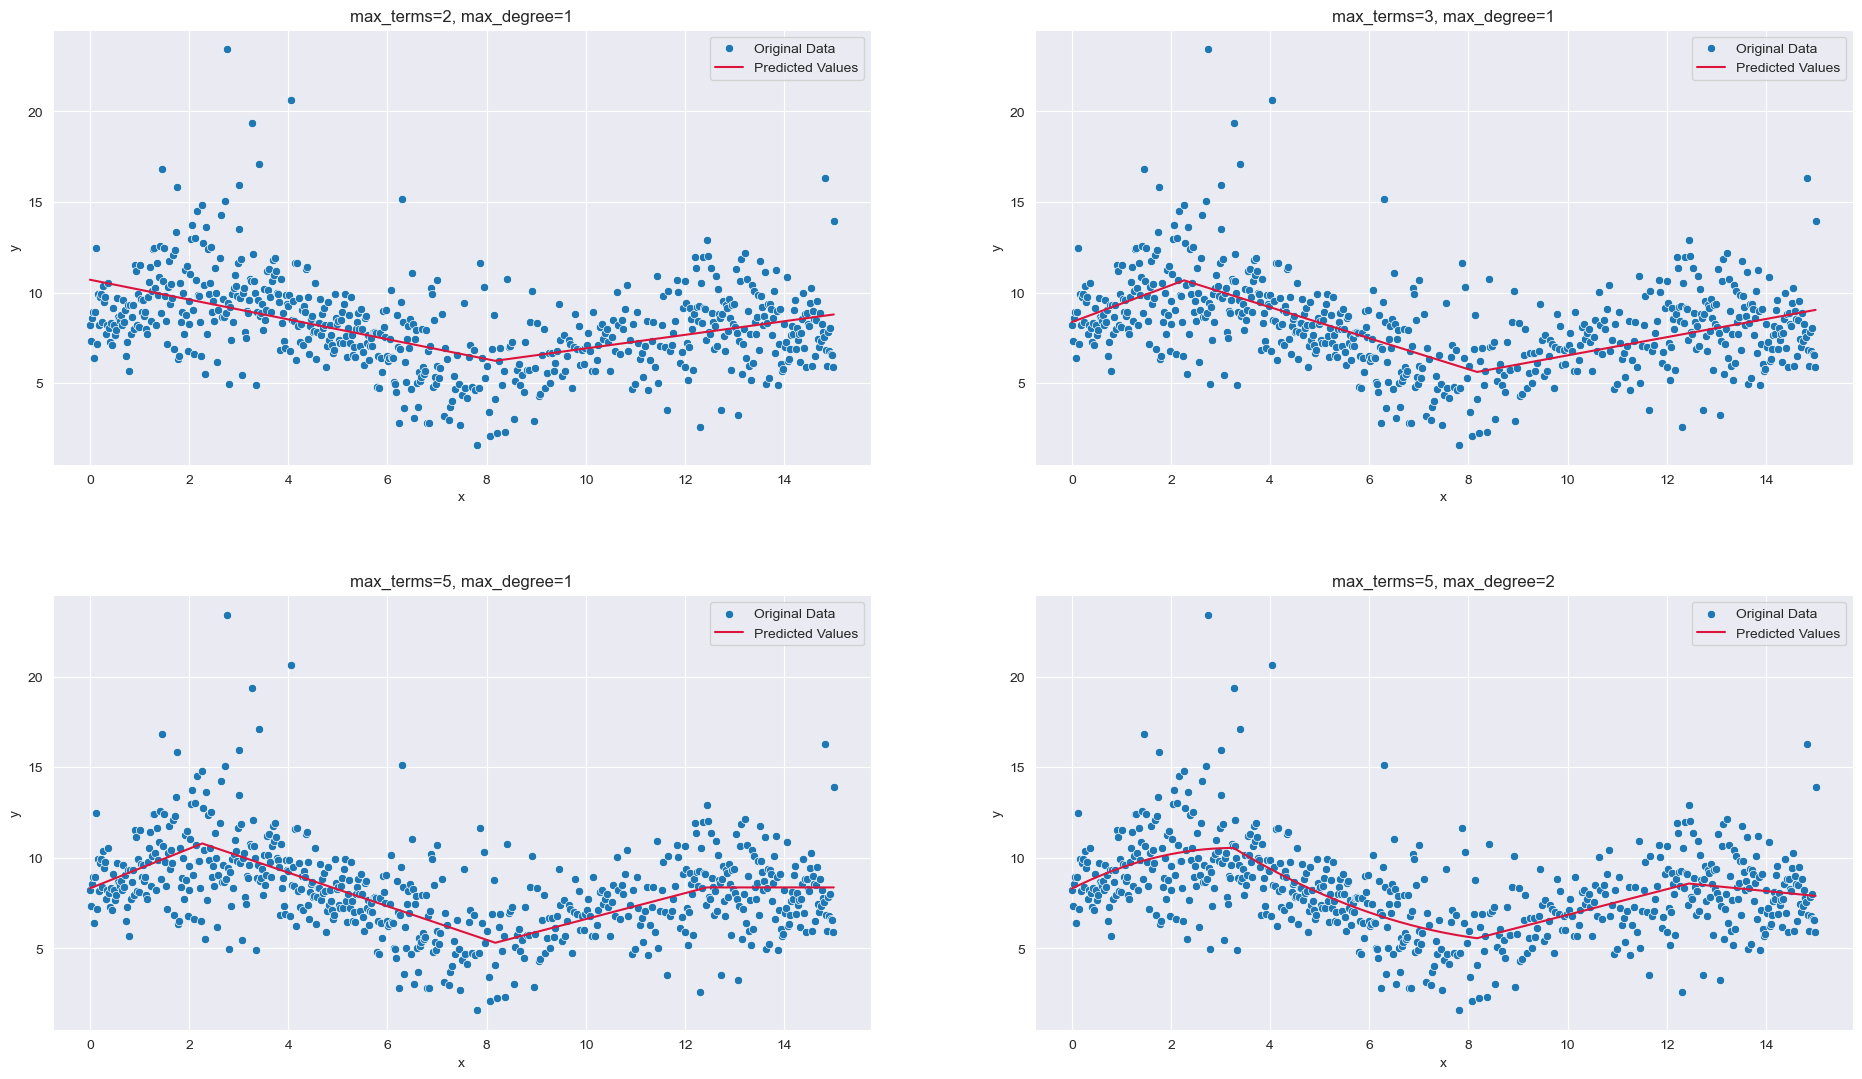

In [6]:
model1 = Earth(max_terms=2, max_degree=1)
model1.fit(x, y)
yhat1 = model1.predict(x)
model2 = Earth(max_terms=3, max_degree=1)
model2.fit(x, y)
yhat2 = model2.predict(x)
model3 = Earth(max_terms=5, max_degree=1)
model3.fit(x, y)
yhat3 = model3.predict(x)
model4 = Earth(max_terms=5, max_degree=2)
model4.fit(x, y)
yhat4 = model4.predict(x)
plt.figure(figsize=(12,10),dpi=300)
plt.subplot(221)
sns.scatterplot(x='x', y='y', data=data_syn, label='Original Data')
sns.lineplot(x, yhat1, color='crimson', label='Predicted Values')
plt.title("max_terms=2, max_degree=1")
plt.subplot(222)
sns.scatterplot(x='x', y='y', data=data_syn, label='Original Data')
sns.lineplot(x, yhat2, color='crimson', label='Predicted Values')
plt.title("max_terms=3, max_degree=1")
plt.subplot(223)
sns.scatterplot(x='x', y='y', data=data_syn, label='Original Data')
sns.lineplot(x, yhat3, color='crimson', label='Predicted Values')
plt.title("max_terms=5, max_degree=1")
plt.subplot(224)
sns.scatterplot(x='x', y='y', data=data_syn, label='Original Data')
sns.lineplot(x, yhat4, color='crimson', label='Predicted Values')
plt.title("max_terms=5, max_degree=2")
plt.subplots_adjust(left=0.0, bottom=0.0, right=1.5, top=1, wspace=0.2, hspace=0.3);

The visual representations of the four MARS models fitting the synthetic data illustrate that:
* As the **max_terms** (maximum basis function) increases, both the number of subregions and the overall complexity of the global MARS model increase.
* For a detailed assessment of the basis functions within the MARS model, the following command can be utilized to print the summary:

In [7]:
print(model3.summary())

Earth Model
-------------------------------------
Basis Function  Pruned  Coefficient  
-------------------------------------
(Intercept)     No      8.36883      
h(x0-8.1745)    Yes     None         
h(8.1745-x0)    No      1.64276      
h(x0-2.26531)   Yes     None         
h(2.26531-x0)   No      -2.01972     
h(x0-12.443)    Yes     None         
h(12.443-x0)    No      -0.715535    
-------------------------------------
MSE: 4.2383, GCV: 4.3514, RSQ: 0.3069, GRSQ: 0.2906


Taking the model3 (**max_terms=5**, **max_degree=1**) as an example:
* There are five  basis funtions including intercept retainedin the final model. 
* The corresponding coefficients are the contribution of each basis function. 
* The final MARS model is 4 piecewise linear model: 
$$ y=  \left\{
\begin{array}{ll}
      10.7644-1.15195(2.38776-x) & x < 2.387776 \\
      10.7644-1.09599(x-2.38776) & x > 2.387776 \text{ and } x < 7.36913  \\
      10.7644-1.90946(x-7.36913) & x > 7.36913 \text{ and } x < 12.2013  \\
      10.7644-1.37112(x-12.2013) & x > 12.2013 \\
\end{array} 
\right. $$ 

### Data Analysis
The dataset used in the subsequent sections comprises information on 1460 houses, including various features associated with each property. The objective is to develop a MARS model capable of accurately predicting housing prices.

#### Preview of the data

In [8]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


#### Features Selection
* The dataset comprises 80 detailed features that encompass various aspects of the house. 
* However, certain features, such as 'Street' and 'LotShape' contain qualitative data—descriptive and categorical in nature. To prepare for the subsequent sections involving MARS model building, it's necessary to exclude these non-numerical data entries.
* The following command get the quantitative features, while removing the 'ID' term. There are total 37 quantitive features including SalePrice.

In [9]:
quant = []
for features in df.columns:
    if df.dtypes[features] != 'object':
        quant.append(features)
        
quant.remove('Id')
len(quant)

37

* Spearman's Rank Correlation Coefficient stands out as a metric particularly useful in scenarios involving outliers and nonlinearity.
* The following heatmap visualizes the Spearman's rank correlation coefficients for the highest 16 quantitative features. 

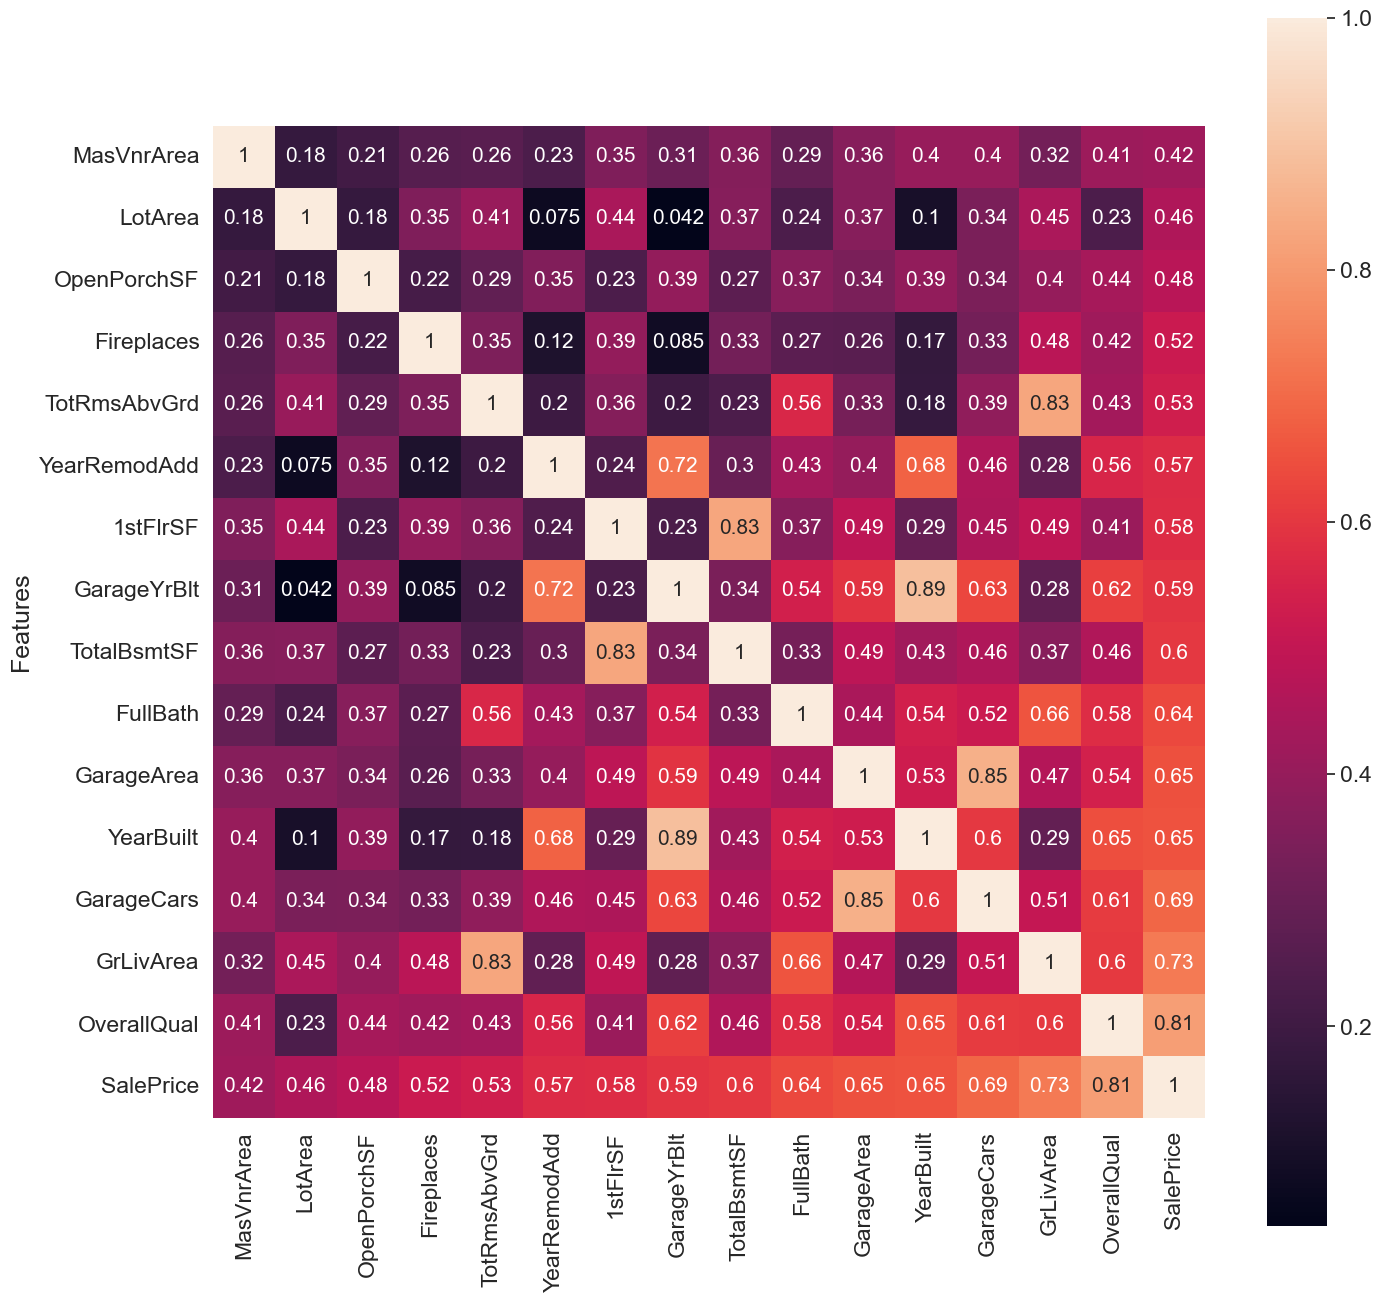

In [10]:
correlation = (df[quant].corr(method='spearman').sort_values('SalePrice'))
correlation.reset_index(inplace=True)
correlation.rename(columns={'index': 'Features'}, inplace=True)
Features_sel = correlation.iloc[-16:]['Features']
correlation_ = correlation.iloc[-16:][list(Features_sel) + ['Features']].copy().set_index('Features')
plt.figure(figsize=(len(correlation_), len(correlation_)))
sns.set(font_scale=1.5)
sns.heatmap(correlation_, cbar=True, annot=True, square=True, annot_kws={'size': 15});

The 15 features with highest Spearsman Coefficient are selected as the predictor features to predict the response feature 'SalePrice'.

In [11]:
Predictor=list(Features_sel)
Predictor.remove('SalePrice')
df_predictor = df[Predictor]
df_response = df[['SalePrice']]
predictor_features = df_predictor.columns.tolist()  # Convert column names to a list
print('Predictor Features are', predictor_features)

Predictor Features are ['MasVnrArea', 'LotArea', 'OpenPorchSF', 'Fireplaces', 'TotRmsAbvGrd', 'YearRemodAdd', '1stFlrSF', 'GarageYrBlt', 'TotalBsmtSF', 'FullBath', 'GarageArea', 'YearBuilt', 'GarageCars', 'GrLivArea', 'OverallQual']


#### Feature Transformation
The predictor and response features are standardized, adjusting their values to have a mean of 0 and a variance of 1. This standardization is essential because the features initially have different units or scales.

In [12]:
scaler_pred= StandardScaler()                                 
stX = scaler_pred.fit_transform(df_predictor.values)              
X_st = pd.DataFrame()                                     
X_st = pd.DataFrame(stX , index=df_predictor.index, columns=df_predictor.columns) 
scaler_resp= StandardScaler()
sty = scaler_resp.fit_transform(df_response.values)              
y_st = pd.DataFrame()                                     
y_st = pd.DataFrame(sty , index=df_response.index, columns=df_response.columns) 

#### Training and Testing Spliting
The dataset is divided into training and testing subsets with a ratio of 7 to 3.

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X_st, y_st, test_size=0.3, random_state=73073)
print('Number of training data = ' + str(len(X_train)) + ' and number of testing data = ' + str(len(X_test)))

Number of training data = 1022 and number of testing data = 438


### Building the MARS Model

The MARS_model is built without setting hyperparameters **Max_terms**,**Max_degree** and **penalty**. The MARS_model consists of 28 basis functions in the formard pass, and 7 of them are pruned in the backward pass. 
From the
``` python
MARS_model.summary()
```
We can evaluate the model performance by following metrics:
* The Mean Square Error. 
* The Generalized Cross Validation (GCV) score: a metric used to estimate the performance of fit of the model, in the context of penalty for complexity.
* $R^2$: the variance explained by the MARS_model. 
* GRSQ: an $R^2$ like metric, is the Generalized $R^2$ after considering the penalty of complexity. 

In [14]:
MARS_model = Earth(allow_missing='true')
MARS_model.fit(X_train, y_train.values)
print(MARS_model.summary())

Earth Model
----------------------------------------------
Basis Function           Pruned  Coefficient  
----------------------------------------------
(Intercept)              No      0.48476      
OverallQual              No      0.27882      
h(GrLivArea-3.19538)     No      -0.544339    
h(3.19538-GrLivArea)     Yes     None         
h(TotalBsmtSF-2.50954)   No      -1.15007     
h(2.50954-TotalBsmtSF)   Yes     None         
h(TotalBsmtSF-1.46976)   No      0.772649     
h(1.46976-TotalBsmtSF)   No      -0.0971461   
YearBuilt                No      0.134323     
h(GrLivArea-0.63304)     No      0.657577     
h(0.63304-GrLivArea)     No      -0.118711    
h(LotArea-0.509646)      No      0.0393578    
h(0.509646-LotArea)      No      -0.30083     
h(YearRemodAdd-1.16939)  No      23.9451      
h(1.16939-YearRemodAdd)  No      -0.0998818   
h(GarageArea-2.55938)    No      -0.755372    
h(2.55938-GarageArea)    Yes     None         
Fireplaces               No      0.086323     
h

### Hyperparameters Tuning
* to optimize the hyperparameters—**max_terms**, **max_degree**, and **penalty**—to attain an optimal model complexity, preventing overfitting. 
*  involve minimizing Mean Squared Error (MSE) and Generalized Cross Validation (GCV),while simultaneously maximizing R-Squared(RSQ) and Generalized R-Squared (GRSQ). 
* the goal is to strike a balance where the model captures patterns effectively while avoiding excessive complexity that might lead to overfitting.

The following command builds 90 different MARS models by iterating through combinations of max_terms(1 to 30) and max_degree(1 to 3), storing the corresponding MSE, GCV, and GRSQ values in arrays MSE_, GCV_, RSQ and GRSQ_.

In [15]:
MSE= np.empty((3,30))
GCV = np.empty((3,30))
RSQ = np.empty((3,30))
GRSQ = np.empty((3,30))
max_terms=np.linspace(1,30,30).astype(int)
max_degree = [1,2,3]
for i in max_degree:
    for j in max_terms:
        model = Earth(max_terms=j, max_degree=i,allow_missing=1)
        model.fit(X_train, y_train.values)
        mse = model.mse_
        gcv = model.gcv_
        grsq = model.grsq_
        rsq = model.rsq_
        MSE[i-1,j-1] = mse
        GCV[i-1,j-1]=gcv
        RSQ[i-1,j-1]=rsq
        GRSQ[i-1,j-1]=grsq

Visualizations for the four metrics across different **max_degree** values plotted against various **max_terms** to observe their trends and relationships.

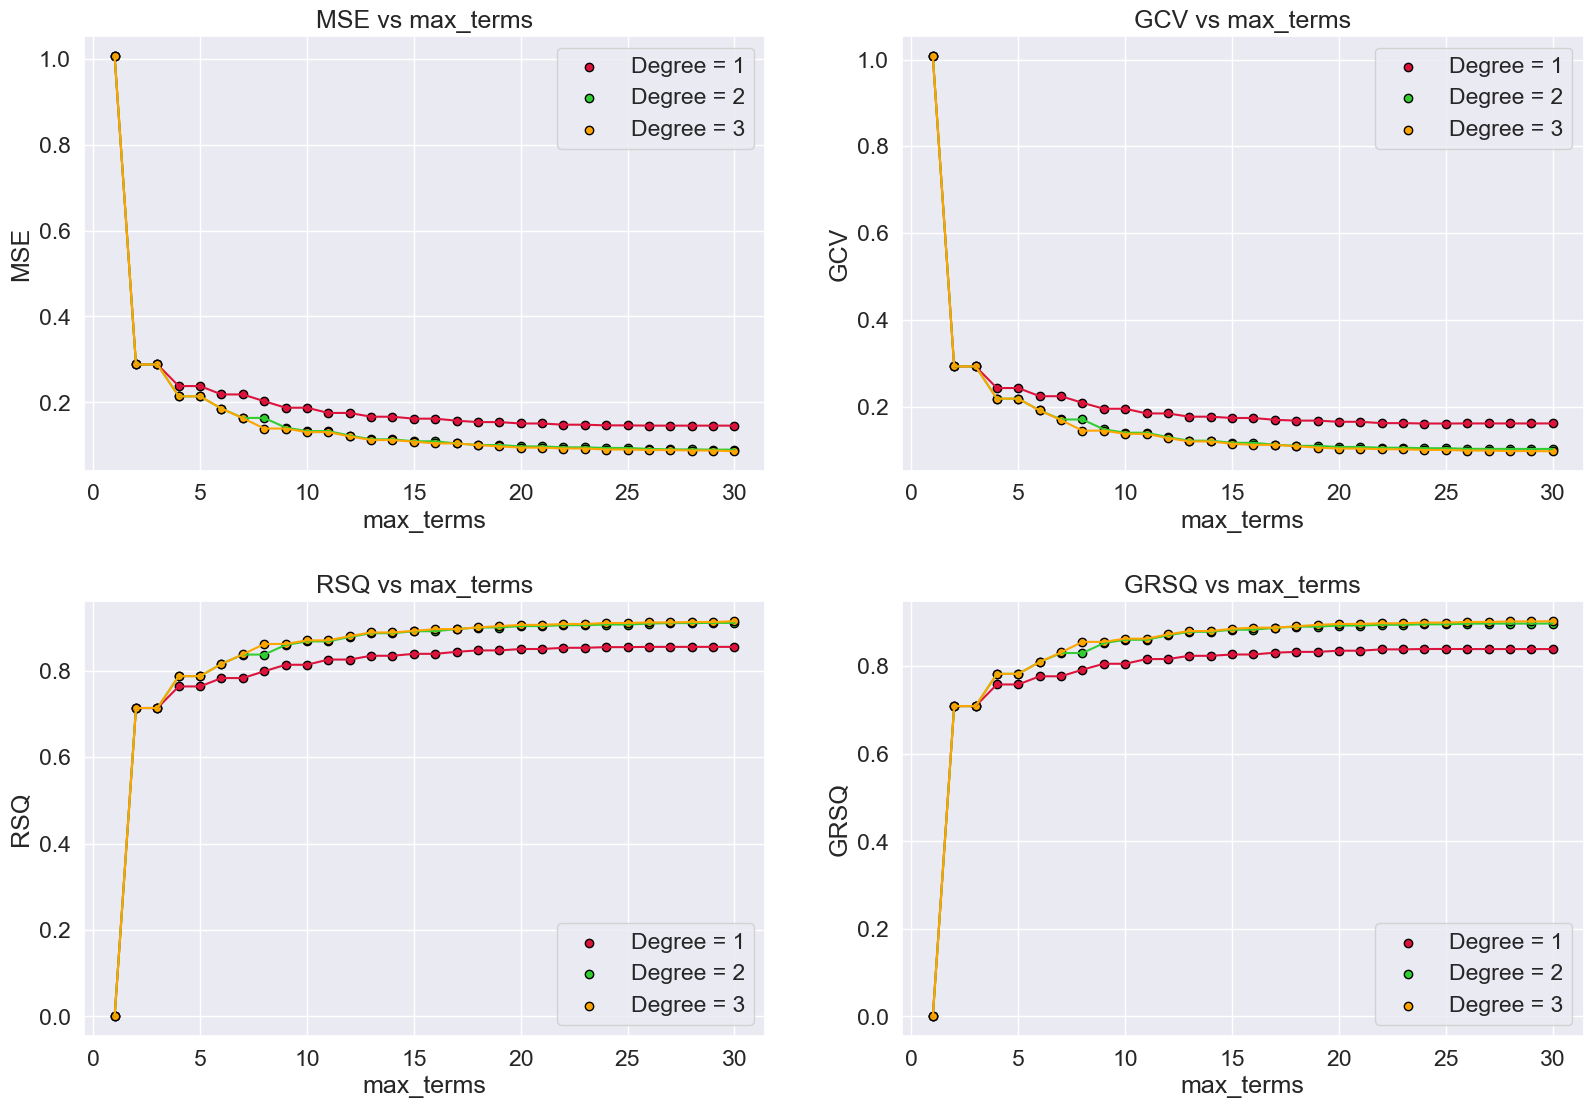

In [16]:
plt.figure(figsize=(10,10))
plt.subplot(221)
plotting(MSE);plt.title("MSE vs max_terms");plt.ylabel('MSE')
plt.subplot(222)
plotting(GCV);plt.title("GCV vs max_terms");plt.ylabel('GCV')
plt.subplot(223)
plotting(RSQ);plt.title("RSQ vs max_terms");plt.ylabel('RSQ')
plt.subplot(224)
plotting(GRSQ);plt.title("GRSQ vs max_terms");plt.ylabel('GRSQ')
plt.subplots_adjust(left=0.0, bottom=0.0, right=1.5, top=1, wspace=0.2, hspace=0.3); 

Based on the plotted data:
* The choice for **max_degree** is set at 2, supported by lower MSE and GCV values compared to degree 1,and the results are similar for degree = 2 and 3 .
* Regarding max_terms, a selection of 14 is made due to the marginal improvements in GRSQ/GCV and slight decrease of MSE and GCV at max_terms=14.

The next step is to tune the hyperparameter, **penalty** with **max_terms** =14 and **max_degree** = 2.

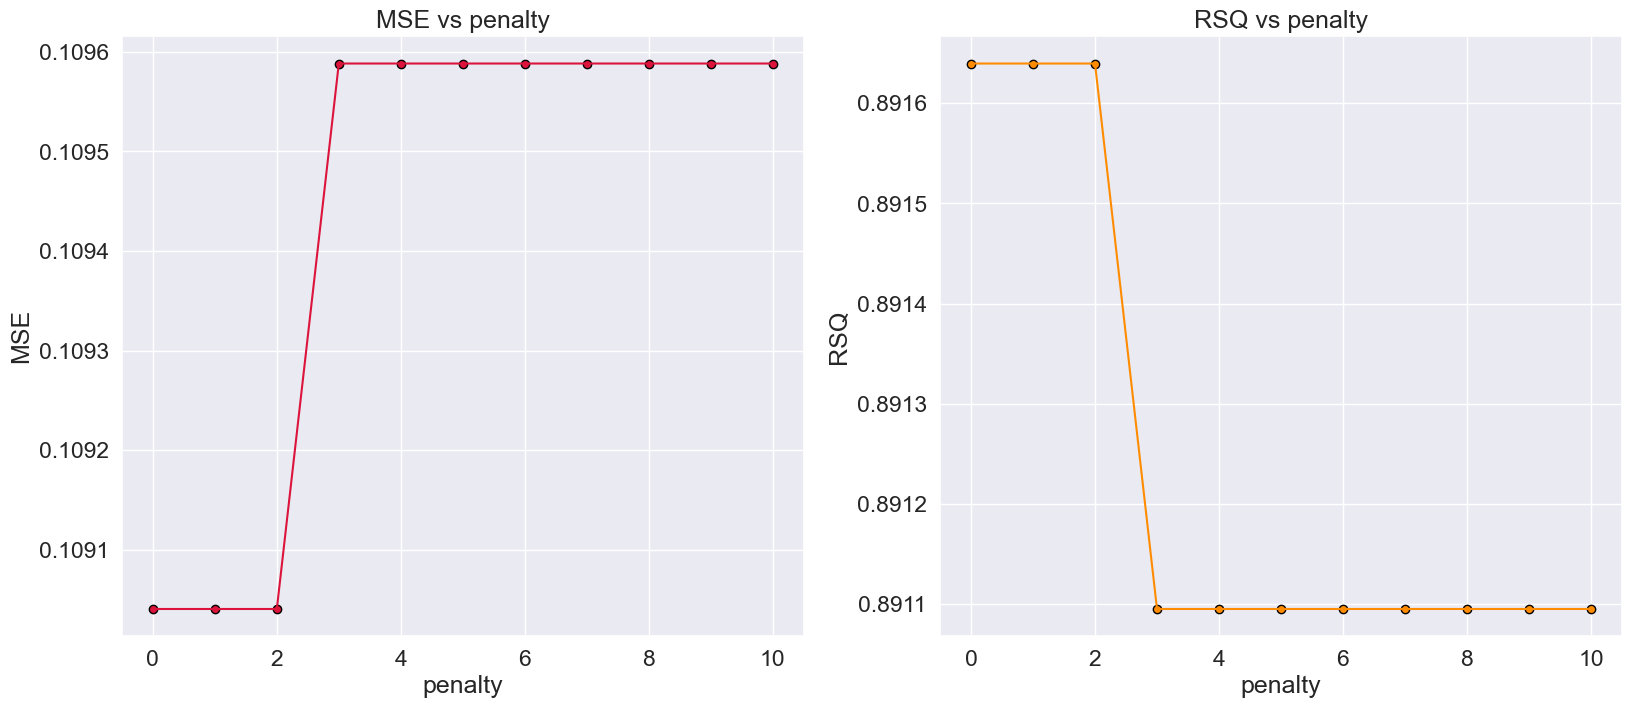

In [17]:
MSE_p= []
RSQ_p= []
penalty = np.linspace(0,10,11)
for p in penalty:
        model = Earth(max_terms=15, max_degree=2,allow_missing=1,penalty=p)
        model.fit(X_train, y_train.values)
        mse = model.mse_
        rsq = model.rsq_
        MSE_p.append(mse)
        RSQ_p.append(rsq)
plt.figure(figsize=(10,6))
plt.subplot(121)
plt.scatter(penalty,MSE_p,color='crimson',edgecolor='black')
plt.plot(penalty,MSE_p,color='crimson');plt.xlabel('penalty');plt.ylabel('MSE')
plt.title("MSE vs penalty")
plt.subplot(122)
plt.scatter(penalty,RSQ_p,color='darkorange',edgecolor='black')
plt.plot(penalty,RSQ_p,color='darkorange',);plt.xlabel('penalty');plt.ylabel('RSQ')
plt.title("RSQ vs penalty")
plt.subplots_adjust(left=0.0, bottom=0.0, right=1.5, top=1, wspace=0.2, hspace=0.3);

The reason behind visualizing MSE and RSQ is due to GCV and GRSQ being metrics influenced by penalty, increasing as penalty increases. Based on the above plots, the conclusion is that the optimal penalty is 2 due to the lower MSE value and the higher RSQ value observed at this penalty setting.

#### Results
After hyperparameter tuning, the final step involves constructing the final model, which is subsequently fitted to the training dataset. This model is then utilized to predict the Saleprice within the testing dataset.

In [18]:
MARS_= Earth(max_terms=14, 
             max_degree=2,
             allow_missing=1,penalty=2,
             feature_importance_type='rss')
MARS_.fit(X_train, y_train.values)
ytestst_predict=MARS_.predict(X_test)
ytrainst_predict=MARS_.predict(X_train)

**Back Transformation**
To interpret the results in a meaningful way for the response features, it's necessary to perform a back transformation on the predicted values.

In [19]:
ytrain_predict = scaler_resp.inverse_transform(ytrainst_predict.reshape(-1,1)).flatten()
ytest_predict = scaler_resp.inverse_transform(ytestst_predict.reshape(-1,1)).flatten()
y_train_back = scaler_resp.inverse_transform(y_train["SalePrice"].values.reshape(-1,1)).flatten()
y_test_back = scaler_resp.inverse_transform(y_test["SalePrice"].values.reshape(-1,1)).flatten()

**Visualization of the predicted value vs. true value**

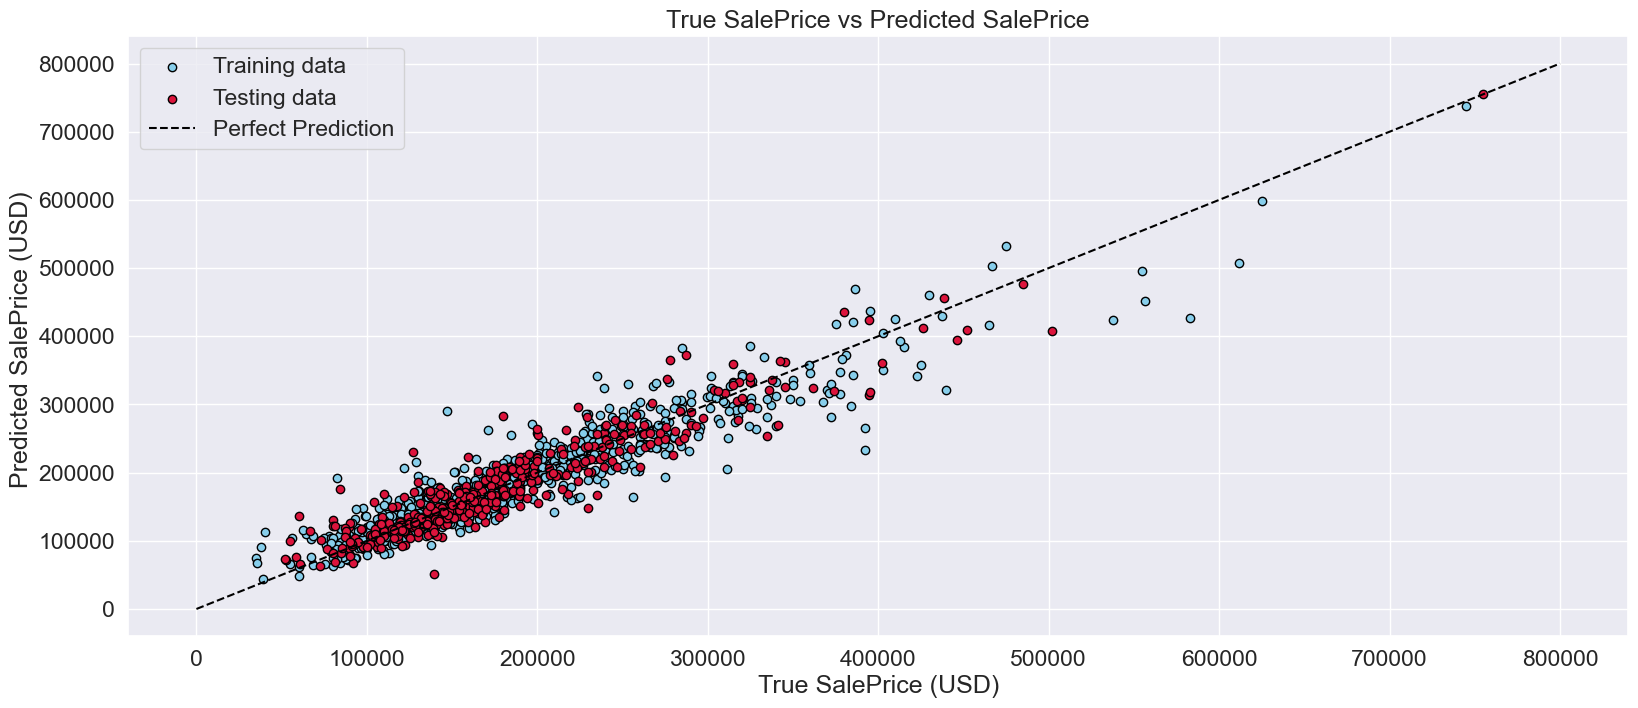

In [20]:
plt.figure(figsize=(10,6))
plt.scatter(y_train_back,ytrain_predict,color='skyblue',edgecolor="black",label='Training data')
plt.scatter(y_test_back,ytest_predict,color='crimson',edgecolor="black",label='Testing data')
plt.xlabel("True SalePrice (USD)");plt.ylabel("Predicted SalePrice (USD) ")
x_= np.linspace(0,800000,100);y_= x_;
plt.plot(x_,y_,color='black', linestyle='--',label= 'Perfect Prediction')
plt.legend(loc='best')
plt.title("True SalePrice vs Predicted SalePrice")
plt.subplots_adjust(left=0.0, bottom=0.0, right=1.5, top=1, wspace=0.2, hspace=0.3);

The model exhibits high performance in accurately predicting SalePrice within both the Testing and Training datasets.

**Automated Feature Selection**

* The unnecessary basis functions are pruned during the backward pass. 
* With command below, we can access the record of  pruning pass.
```python 
model.pruning_pass_record_
```
* From information below, we can see that , at the second iteration, 14 terms are selected with minimum MSE and GCCV, but highest RSQ and GRSQ.

In [21]:
print(MARS_.pruning_pass_record_)

--------------------------------------------
iter  bf  terms  mse   gcv    rsq    grsq   
--------------------------------------------
0     -   15     0.11  0.121  0.887  0.880  
1     4   14     0.11  0.120  0.887  0.881  
2     11  13     0.11  0.121  0.886  0.880  
3     13  12     0.12  0.124  0.882  0.877  
4     8   11     0.12  0.128  0.878  0.873  
5     14  10     0.13  0.133  0.873  0.869  
6     5   9      0.14  0.140  0.866  0.861  
7     1   8      0.14  0.145  0.860  0.856  
8     2   7      0.15  0.152  0.853  0.850  
9     7   6      0.16  0.160  0.845  0.842  
10    6   5      0.19  0.192  0.812  0.809  
11    12  4      0.26  0.264  0.741  0.738  
12    3   3      0.38  0.381  0.625  0.622  
13    9   2      0.57  0.573  0.434  0.432  
14    10  1      1.01  1.008  0.000  0.000  
--------------------------------------------


* The feature importance can be accessed through model.feature_importances_. 
* The automated feature selection facilitate the feature engineering process during the data analysis. 
* In our model prediction, although 15 predictor features are selected at first, but  only 7 features prove essential in the prediction process.

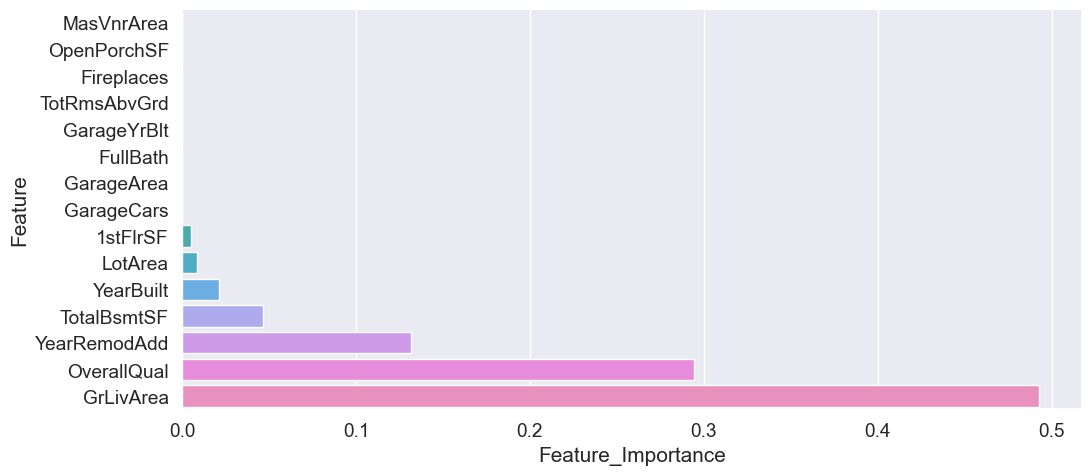

In [22]:
df_FI = pd.DataFrame({'Feature_Importance': MARS_.feature_importances_, 'Feature': X_train.columns})
sorted_data = df_FI.sort_values(by='Feature_Importance')
sns.set(font_scale=1.25)
sns.barplot(x='Feature_Importance', y='Feature', data=sorted_data)
plt.subplots_adjust(left=0.0, bottom=0.0, right=1.5, top=1, wspace=0.2, hspace=0.3);

#### Summary
This project outlines the sequential process of employing the Multivariate Adaptive Regression Splines (MARS) model. Following hyperparameter tuning, a MARS model featuring 14 max_terms, a degree of 2, and a penalty of 2 is employed. This model predicts housing prices in Ames, Iowa, using 7 select features from the original 79. Results show the model's accurate predictive performance across both the Training and Testing datasets.

MARS holds an advantage in its ability to flexibly capture nonlinear relationships within the data, significantly reducing the need for extensive feature engineering while automating feature selection. However, its downside lies in computational complexity. The algorithm examine each predictor's values for potential cutpoints, leading to increased computational demands as the dataset size and number of feature  expand.

For more Information about MARS, please refer :
* https://contrib.scikit-learn.org/py-earth/content.html
* Friedman, Jerome H. 1991. “Multivariate Adaptive Regression Splines.” The Annals of Statistics. JSTOR http://www.stat.yale.edu/~lc436/08Spring665/Mars_Friedman_91.pdf

### About ME

Hello, I'm currently a PhD student in the Hildebrand Department of Petroleum and Geosystem Engineering, specializing in addressing flow assurance challenges within hydrocarbon and hydrogen systems. 

I hope this workflow on MARS is helpful!

Hao Wang

hwang000@utexas.edu

___________________

#### Work Supervised by:

### Michael Pyrcz, Associate Professor, University of Texas at Austin 
*Novel Data Analytics, Geostatistics and Machine Learning Subsurface Solutions*

With over 17 years of experience in subsurface consulting, research and development, Michael has returned to academia driven by his passion for teaching and enthusiasm for enhancing engineers' and geoscientists' impact in subsurface resource development. 

For more about Michael check out these links:

#### [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)

#### Want to Work Together?

I hope this content is helpful to those that want to learn more about subsurface modeling, data analytics and machine learning. Students and working professionals are welcome to participate.

* Want to invite me to visit your company for training, mentoring, project review, workflow design and / or consulting? I'd be happy to drop by and work with you! 

* Interested in partnering, supporting my graduate student research or my Subsurface Data Analytics and Machine Learning consortium (co-PIs including Profs. Foster, Torres-Verdin and van Oort)? My research combines data analytics, stochastic modeling and machine learning theory with practice to develop novel methods and workflows to add value. We are solving challenging subsurface problems!

* I can be reached at mpyrcz@austin.utexas.edu.

I'm always happy to discuss,

*Michael*

Michael Pyrcz, Ph.D., P.Eng. Associate Professor The Hildebrand Department of Petroleum and Geosystems Engineering, Bureau of Economic Geology, The Jackson School of Geosciences, The University of Texas at Austin
